# VGG16 - Multi Classification


## Importing and defining model

In [1]:
from keras.applications.vgg16 import VGG16
# model = VGG16()

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
# Define the image size accepted by VGG16
IMAGE_SIZE = [224, 224]

# Define path to dataset if available
# train_path = 'path_to_train_dataset'
# valid_path = 'path_to_validation_dataset'

In [4]:
# Load VGG16 without the head and include preprocessing
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/Final Year Project/AI/Dataset_All_Drones'

print(dataset_path)
# Useful for getting number of classes
folders = dataset_path
folders

/content/drive/MyDrive/Final Year Project/AI/Dataset_All_Drones


'/content/drive/MyDrive/Final Year Project/AI/Dataset_All_Drones'

In [11]:
os.listdir(dataset_path)

['Drone_Panthom', 'Drone_Fac', 'env', 'Drone_mini']

In [12]:
# Adding custom layers
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
# Model compilation for binary classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,409,924 (154.15 MB)

 Trainable params: 25,695,236 (98.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Data preprocessing

In [15]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, image_size=(224,224))
data_iterator  = data.as_numpy_iterator()
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print('max: ', batch[0].max())
print('min: ', batch[0].min())

Found 3888 files belonging to 4 classes.
max:  1.0
min:  0.0


In [16]:
# Load the dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    label_mode='int'  # 'int' for integer labels (change to 'categorical' if your TF version supports it directly in image_dataset_from_directory)
)

# Update the mapping function to apply one-hot encoding
def process_image(image, label):
    # Normalize the image
    image = image / 255.0
    # One-hot encode the labels assuming 4 classes in total
    label = tf.one_hot(label, depth=4)
    return image, label

# Apply the processing function to the dataset
data = data.map(process_image)

# Create data iterators
data_iterator = data.as_numpy_iterator()
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print('max: ', batch[0].max())
print('min: ', batch[0].min())

Found 3888 files belonging to 4 classes.
max:  1.0
min:  0.0


In [17]:
print(batch[1])

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.numpy().astype("uint8"))  # Ensure the image is displayed correctly
#     # Convert one-hot encoded labels back to class indices
#     class_index = np.argmax(batch[1][idx])
#     ax[idx].set_title(f'Class Index: {class_index}')
#     ax[idx].axis('off')  # Optionally hide axes for a cleaner look

# plt.show()

In [19]:
train_size = int(len(data)*0.7)

# Used to evaulate the data while we train
val_size = int(len(data)*0.2)

# Not seen until the end of the training
test_size = int(len(data)*0.1)

print('First Iteration :', train_size, val_size, test_size)


addition_data = train_size+val_size+test_size
if addition_data == len(data):
  pass
else:
  additional = len(data) - addition_data
  test_size += additional

print('Second Iteration :', train_size, val_size, test_size)
print('Total Length = ', len(data))
print('Sum of length = ', (train_size + val_size + test_size))

First Iteration : 85 24 12
Second Iteration : 85 24 13
Total Length =  122
Sum of length =  122


In [20]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)
print(train_data)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [21]:
# Assuming train_data, val_data, and test_data are already batched and preprocessed
# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

## Training the model

In [22]:
# Fit the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 934s 3s/step - accuracy: 0.2843 - loss: 4.2044 - val_accuracy: 0.4323 - val_loss: 1.2293
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.4471 - loss: 1.2099 - val_accuracy: 0.3906 - val_loss: 1.3701
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.5736 - loss: 1.0685 - val_accuracy: 0.6042 - val_loss: 1.0251
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 176ms/step - accuracy: 0.6754 - loss: 0.9000 - val_accuracy: 0.7279 - val_loss: 0.8375
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.7468 - loss: 0.7431 - val_accuracy: 0.6198 - val_loss: 0.8466
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.7454 - loss: 0.7215 - val_accuracy: 0.5872 - val_loss: 0.9479
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.7469 - loss: 0.7228 - val_accuracy: 0.6849 - val_loss: 0.7207
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.7396 - loss: 0.6848 - val_accura

Implementing early stopping

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up early stopping
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Number of epochs with no improvement after which training will be stopped
#     verbose=1,
#     restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
# )

# # Fit the model with early stopping
# history = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=100,  # Set a high number, early stopping will halt training once learning stagnates
#     callbacks=[early_stopping_monitor]
# )


In [23]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.8366 - loss: 0.4317
Test accuracy: 0.8349999785423279, Test loss: 0.4331728219985962


## Plot Performance

In [24]:
# Predictions
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Get true labels from the test_data
true_labels = np.concatenate([y for x, y in test_data], axis=0)
true_labels = np.argmax(true_labels, axis=1)  # Convert one-hot encoded labels to class indices

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step


In [25]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[120   0   0   0]
 [  9  58   4   3]
 [ 24   9  60   6]
 [  5   1   5  96]]


Confusion matrix, without normalization
Normalized confusion matrix


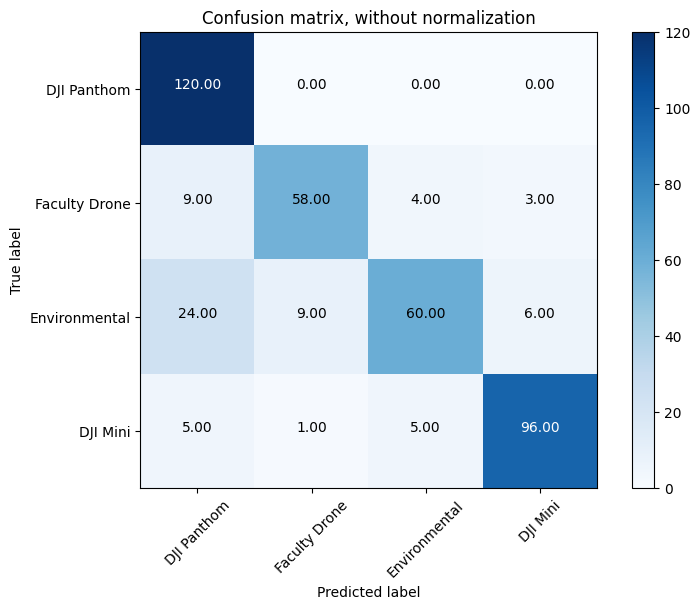

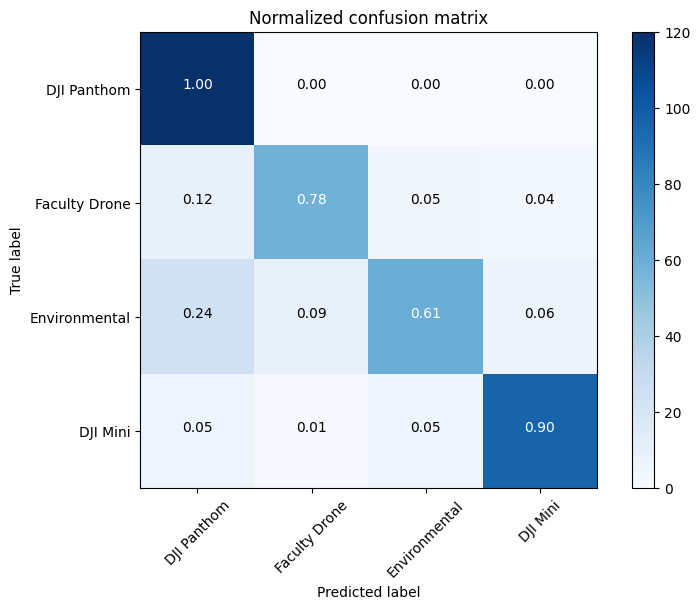

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example class labels for a four-class scenario
class_labels = ['DJI Panthom', 'Faculty Drone', 'Environmental', 'DJI Mini']

# Example usage of the function
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_labels, normalize=False,
                      title='Confusion matrix, without normalization')

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [28]:
# Assuming four classes now
class_names = ['DJI Panthom', 'Faculty Drone', 'Environmental', 'DJI Mini']
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

  DJI Panthom       0.76      1.00      0.86       120
Faculty Drone       0.85      0.78      0.82        74
Environmental       0.87      0.61      0.71        99
     DJI Mini       0.91      0.90      0.91       107

     accuracy                           0.83       400
    macro avg       0.85      0.82      0.83       400
 weighted avg       0.85      0.83      0.83       400



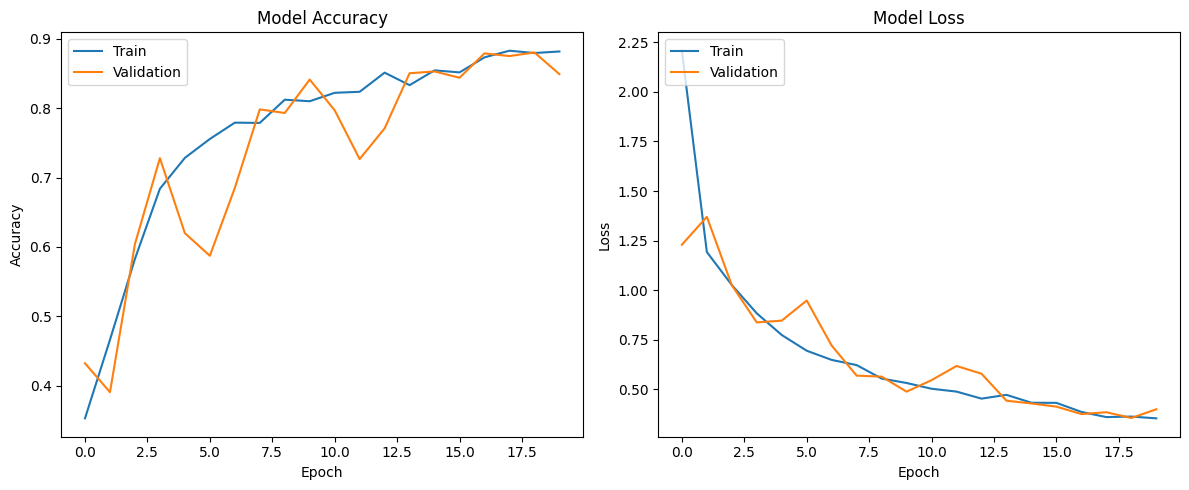

In [30]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your model
# It contains the history of training/validation loss and accuracy

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Cross Validation

In [35]:
import numpy as np
from sklearn.model_selection import KFold

# Example: Assuming `full_dataset` is a TensorFlow Dataset containing all your data
# Let's say `dataset_size` is the number of examples in `full_dataset`
dataset_size = len(list(dataset_path))  # This is not efficient, preferably know this a priori
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [36]:
def create_model():
    base_model = VGG16(include_top=False, input_shape=IMAGE_SIZE + [3], weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    inputs = Input(shape=IMAGE_SIZE + [3])
    x = base_model(inputs, training=False)  # Ensure the base model is in inference mode
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)  # Change to 4 for the number of classes
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy
    return model

# Generate train and test subsets for the current fold
# Assume `data` is a TensorFlow dataset properly shuffled and batched
train_data = data.shard(num_shards=k, index=fold_no-1)
test_data = data.shard(num_shards=k, index=fold_no-1)

for train_index, test_index in kf.split(np.arange(dataset_size)):
    # Creating datasets for the training and testing in each fold
    train_data = data.take(len(train_index)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    test_data = data.skip(len(train_index)).take(len(test_index)).cache().prefetch(buffer_size=AUTOTUNE)


In [37]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(np.arange(dataset_size)):
    # Properly create subsets each fold, assuming `data` is already shuffled
    train_data = data.take(len(train_index)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    test_data = data.skip(len(train_index)).take(len(test_index)).cache().prefetch(buffer_size=AUTOTUNE)

    model_cross_val = create_model()

    print(f'Training fold {fold_no}...')
    history = model_cross_val.fit(train_data, epochs=20, validation_data=test_data)

    scores = model_cross_val.evaluate(test_data)
    print(f'Score for fold {fold_no}: {model_cross_val.metrics_names[0]} of {scores[0]}; {model_cross_val.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

print('Average scores for all folds:')
print(f'Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Loss: {np.mean(loss_per_fold)}')


Training fold 1...
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 599ms/step - accuracy: 0.2798 - loss: 4.6493 - val_accuracy: 0.5264 - val_loss: 1.0412
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 143ms/step - accuracy: 0.6143 - loss: 0.9617 - val_accuracy: 0.7236 - val_loss: 0.8574
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.6681 - loss: 0.8688 - val_accuracy: 0.7212 - val_loss: 0.7949
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.7217 - loss: 0.7469 - val_accuracy: 0.7188 - val_loss: 0.8504
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.6899 - loss: 0.7983 - val_accuracy: 0.6611 - val_loss: 0.7974
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.7188 - loss: 0.7388 - val_accuracy: 0.7356 - val_loss: 0.7379
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.7159 - loss: 0.7708 - val_accuracy: 0.7909 - val_loss: 0.6585
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.7744 - loss: 0

### Viewing cross validation resuts

Plotting Accuracy and Loss for Each Fold

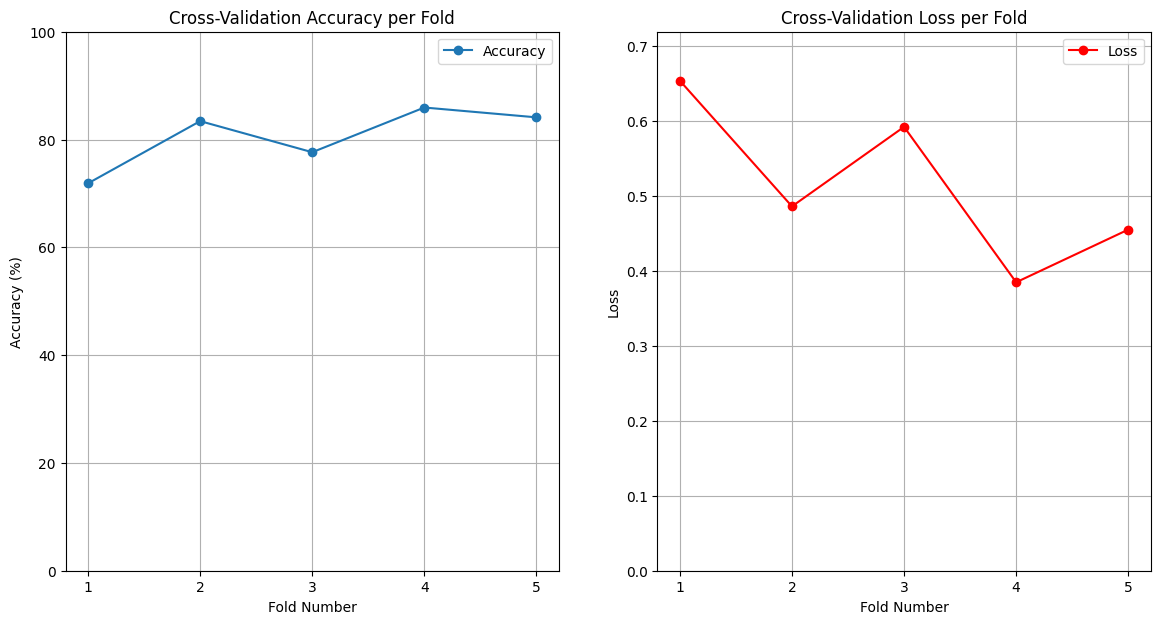

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming acc_per_fold and loss_per_fold are filled with the accuracy and loss data from each fold
fold_numbers = range(1, len(acc_per_fold) + 1)  # Fold numbers

plt.figure(figsize=(14, 7))

# Plotting accuracy per fold
plt.subplot(1, 2, 1)
plt.plot(fold_numbers, acc_per_fold, marker='o', label='Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(fold_numbers)
plt.ylim(0, 100)  # Set y-axis to start at 0 and end at 100%
plt.grid(True)
plt.legend()

# Plotting loss per fold
plt.subplot(1, 2, 2)
plt.plot(fold_numbers, loss_per_fold, marker='o', color='red', label='Loss')
plt.title('Cross-Validation Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(fold_numbers)
# Set an appropriate y-axis range for the loss values
plt.ylim(0, max(loss_per_fold) * 1.1)  # Adjust upper limit to 110% of the maximum value for better visualization
plt.grid(True)
plt.legend()

plt.show()

Boxplot for a Summary View

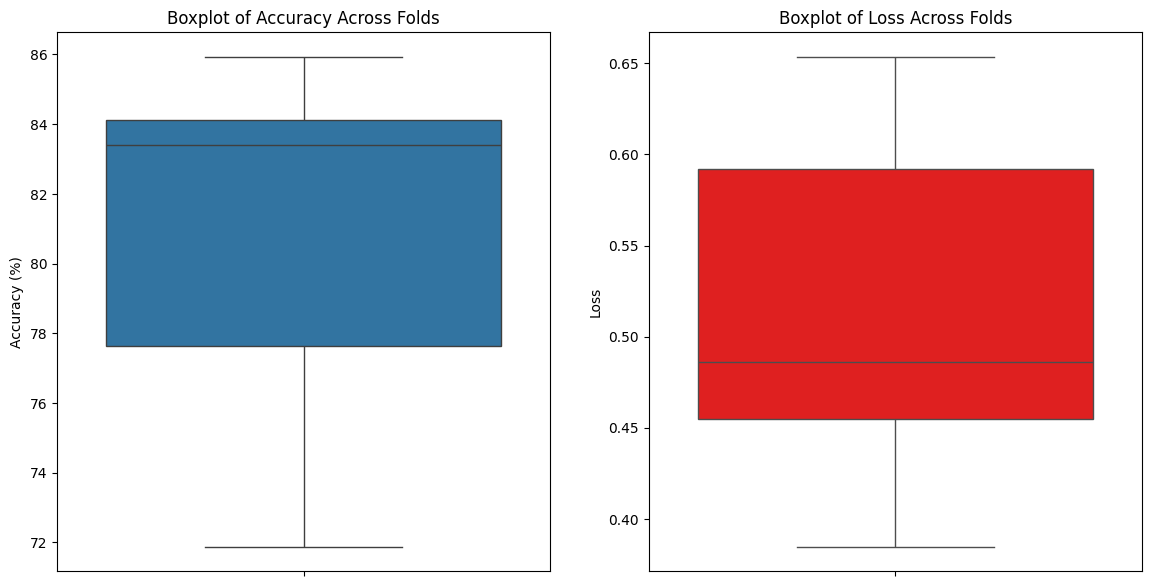

In [39]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plotting accuracy boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=acc_per_fold)
plt.title('Boxplot of Accuracy Across Folds')
plt.ylabel('Accuracy (%)')

# Plotting loss boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=loss_per_fold, color='red')
plt.title('Boxplot of Loss Across Folds')
plt.ylabel('Loss')

plt.show()

Histogram of Performance

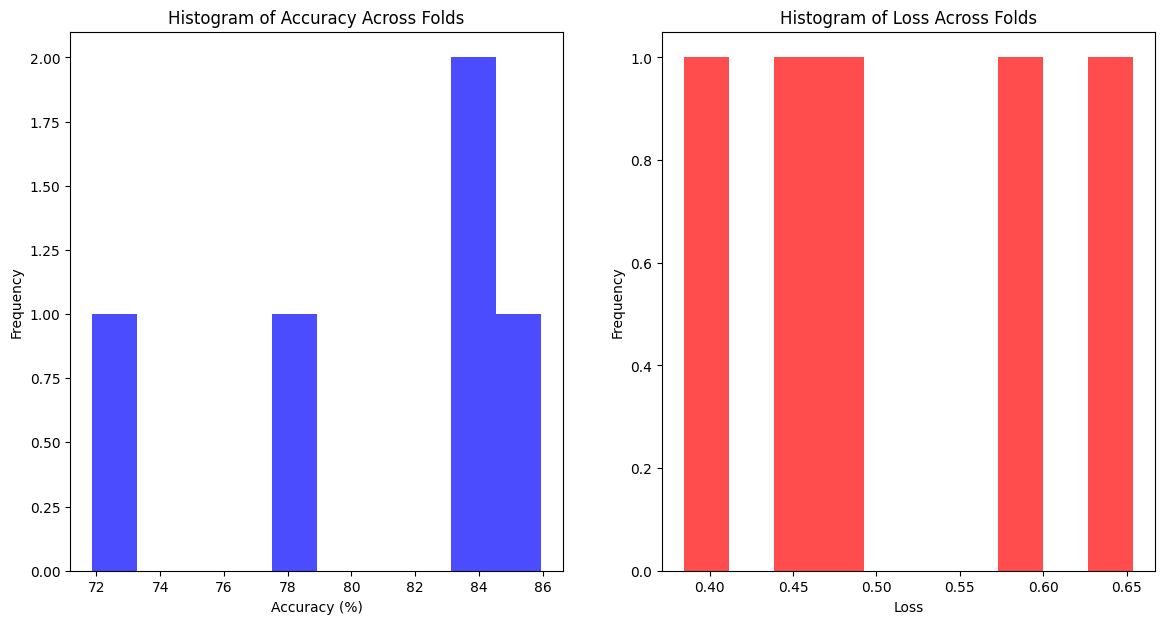

In [40]:
plt.figure(figsize=(14, 7))

# Histogram of accuracy
plt.subplot(1, 2, 1)
plt.hist(acc_per_fold, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Accuracy Across Folds')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

# Histogram of loss
plt.subplot(1, 2, 2)
plt.hist(loss_per_fold, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Loss Across Folds')
plt.xlabel('Loss')
plt.ylabel('Frequency')

plt.show()


Combined Scatter Plot

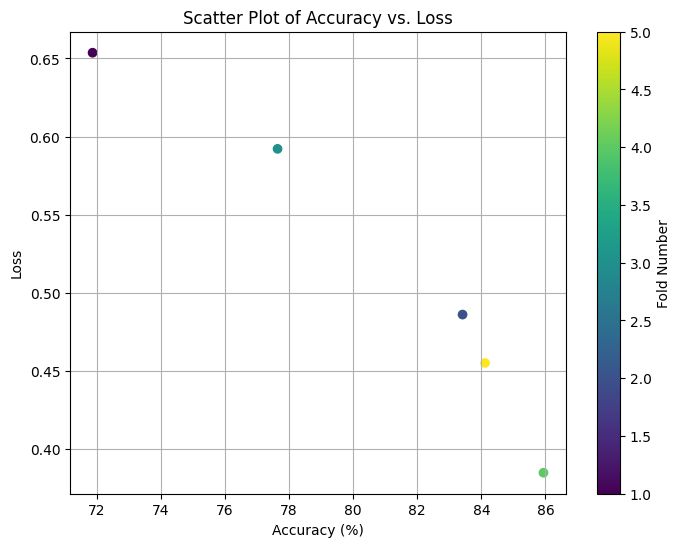

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(acc_per_fold, loss_per_fold, c=fold_numbers, cmap='viridis')
plt.colorbar(label='Fold Number')
plt.title('Scatter Plot of Accuracy vs. Loss')
plt.xlabel('Accuracy (%)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
